# Logistic regression

In this exercise, you will implement logistic regression and apply it to two different datasets. 

Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. 

You have historical data from previous applicants that you can use as a training set for logistic regression. 

For each training example, you have the applicant’s scores on two exams and the admissions decision

# Visualizing the data

In [2]:
data = pd.read_csv('./ex2data1.txt', header=None, names=['exam1','exam2','is_admitted'])

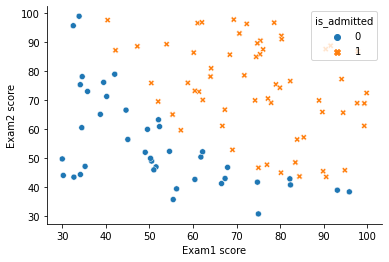

In [3]:
fig, ax = plt.subplots()
sns.scatterplot(x=data['exam1'], y=data['exam2'], hue=data['is_admitted'], style=data['is_admitted'], ax=ax, legend='brief');
sns.despine();
plt.xlabel('Exam1 score');
plt.ylabel('Exam2 score');

# Sigmoid function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

h(x) = g(theta, x)

where function g is the sigmoid function. The sigmoid function is defined as:

g(z) = 1 / (1 + e^(-z))

In [4]:
def sigmoid(x):
    '''
    compute the sigmoid value from the given x value, or array.
    '''
    return 1 / (1 + np.power(np.e, -x))

sigmoid(0), sigmoid(1e10), sigmoid(np.array([0,1,1e10]))

(0.5, 1.0, array([0.5       , 0.73105858, 1.        ]))

# Cost function and gradient

Recall that the cost function in logistic regression is



In [5]:
def compute_cost(t, x, y):

    # preprocess - the shape of t has been changed in optimized function, so we need to enforce it here.
    t = t.reshape((-1,1))
    
    h = sigmoid(np.matmul(x,t))
    term1 = y * np.log(h)
    term2 = (1-y) * np.log(1-h)
    J = np.mean(-term1-term2)
    return J

def compute_grad(t, x, y):

    # preprocess - the shape of t has been changed in optimized function, so we need to enforce it here.
    t = t.reshape((-1,1))

    h = sigmoid(np.matmul(x,t))
    grad = np.mean((h-y)*x,axis=0)
    
    return grad.flatten()

In [6]:
# process data
n = len(data.columns) - 1
m = len(data)
x, y = np.array(data.iloc[:, 0:-1]).reshape(-1,n), np.array(data.iloc[:, -1]).reshape(-1,1)

# add constant term
x_const = np.concatenate((np.ones(m).reshape(-1,1), x), axis=1)
x_const.shape, y.shape

# initial
t = np.zeros(n+1).reshape(-1,1)
t.shape

# test
J = compute_cost(t, x_const, y)
grad = compute_grad(t, x_const, y)
assert round(J, 3) == 0.693
assert all(np.round(grad, 4) == np.array([-0.1, -12.0092, -11.2628]))

new_t = np.array([-24, .2, .2]).reshape(-1,1)
J = compute_cost(new_t, x_const, y)
grad = compute_grad(new_t, x_const, y)
assert round(J, 3) == 0.218
assert all(np.round(grad, 3) ==  np.array([0.043, 2.566, 2.647]))

# Learning parameters using fminunc

Instead of using `fminunc` in the octave, we will use the op.minimize from python `scipy` package instead.
[Referece](https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy)

In [7]:
import scipy.optimize as op

opt_t = op.minimize(fun = compute_cost, 
                                 x0 = t,
                                 args = (x_const, y),
                                 method = 'TNC',
                                 jac = compute_grad).x

assert round(compute_cost(opt_t, x_const, y), 3) == 0.203
assert all(np.round(opt_t, 3) == np.array([-25.161, 0.206, 0.201]))

After learning the parameters, you can use the model to predict whether a particular student will be admitted. 

For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776.

In [8]:
new_x = np.array([1, 45, 85])
pred = sigmoid(new_x.dot(opt_t))
print(f'The probability that the student who got exam1 45 points and exam2 85 points will be admitted is {pred * 100:.2f} %')
assert round(pred, 3) == 0.776

The probability that the student who got exam1 45 points and exam2 85 points will be admitted is 77.63 %


In [9]:
p = sigmoid(np.matmul(x_const, opt_t))
threshold = .5
p = (p >= .5).astype(int).reshape(-1,1)
acc = np.mean(p == y)
print(f'The training set accuracy is {acc * 100} %')
assert acc == 0.89

The training set accuracy is 89.0 %


# Evaluating logistic regression

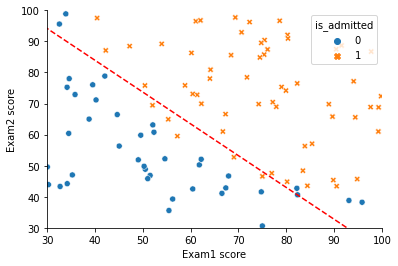

In [10]:
# Scatter plot

fig, ax = plt.subplots()
sns.scatterplot(x=data['exam1'], y=data['exam2'], hue=data['is_admitted'], style=data['is_admitted'], ax=ax, legend='brief');
sns.despine();
plt.xlabel('Exam1 score');
plt.ylabel('Exam2 score');

# Add Decision boundary line

axes = plt.gca()
plt_x = np.array(axes.get_xlim())
# we know that, on the x1, x2 planes, the value y is 0, thus
# 0 = t(0) + t(1) * x1 + t(2) * x2
# we need to find x2; thus, we get 
# x2 = (- t(0) - t(1) * x1) / t(2)
# x2 = - (t(0) + t(1) * x1) / t(2)
plt_y = -(opt_t[0] + opt_t[1] * plt_x) / opt_t[2]
plt.plot(plt_x, plt_y, '--', c='red');
plt.xlim(30,100);
plt.ylim(30,100);